In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MultiLabelBinarizer

In [3]:
movie = pd.read_csv('/content/movies.dat', sep='::', engine='python', encoding='ISO-8859-1')


In [4]:
movie.columns =['MovieIDs','Name','Genre']
movie.dropna(inplace=True)
movie.head()

,MovieIDs,Name,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [5]:
!unzip ratings.dat.zip

Archive:  ratings.dat.zip
replace ratings.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
rating = pd.read_csv("/content/ratings.dat",sep='::', engine='python')

rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [7]:
user = pd.read_csv("/content/users.dat",sep='::',engine='python')
user.columns =['UserID','Sex','Age','Occupation','Pincode']
user.dropna(inplace=True)
user.head()

,UserID,Sex,Age,Occupation,Pincode
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [8]:
df = pd.concat([movie, rating,user], axis=1)
df.head()

,MovieIDs,Name,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Sex,Age,Occupation,Pincode
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


Text(0.5, 0, 'Age')

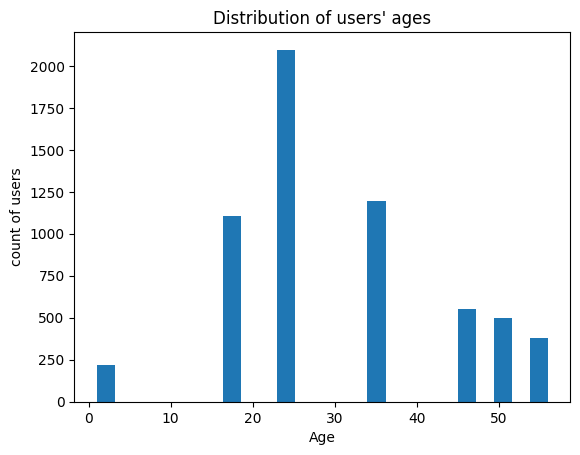

In [9]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

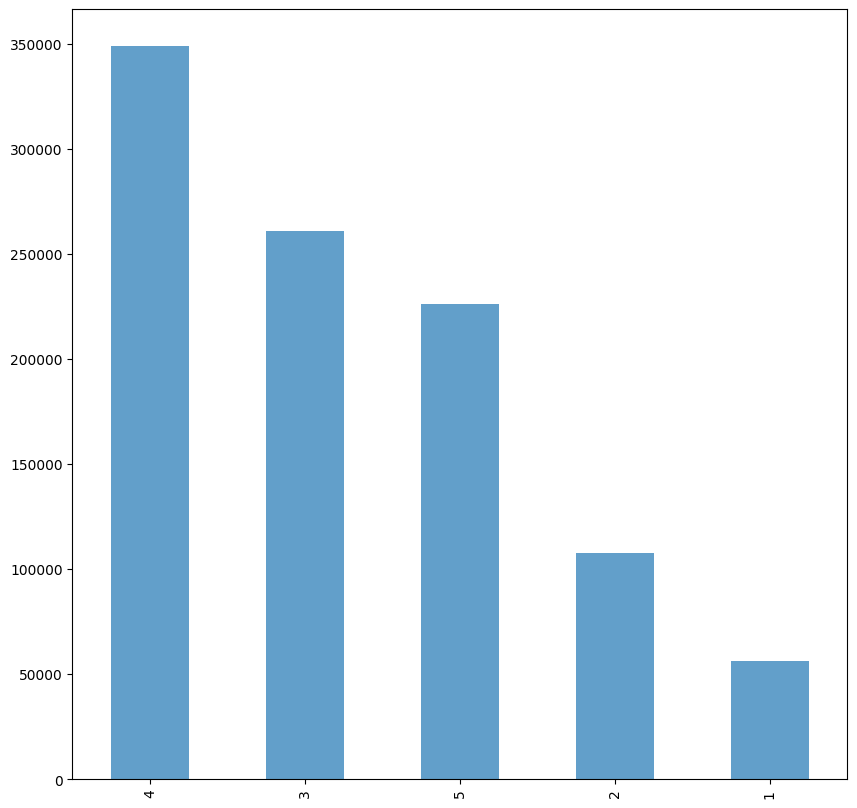

In [10]:
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [11]:
movies = df.groupby('Name').size().sort_values(ascending=True)[:1000]
print(movies)

Name
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


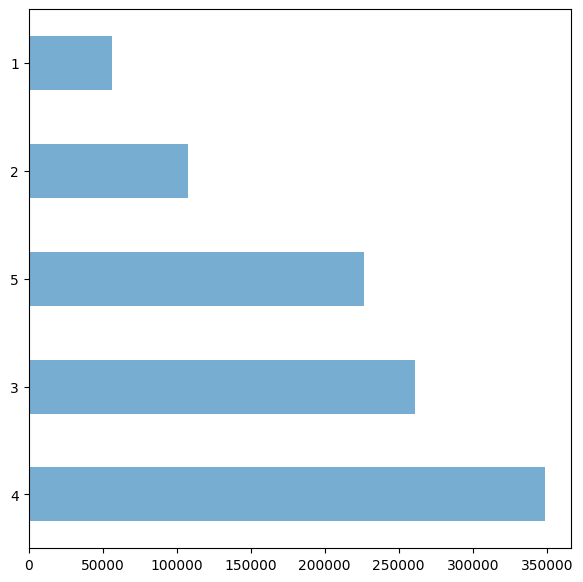

In [12]:
top10 = df[10:]
top10['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [13]:
first500 = df[500:]
first500.dropna(inplace=True)

<ipython-input-13-31bc389970a8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first500.dropna(inplace=True)


In [14]:
features = first500[['MovieID','Age','Occupation']].values

In [15]:
labels = first500[['Ratings']].values

In [16]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

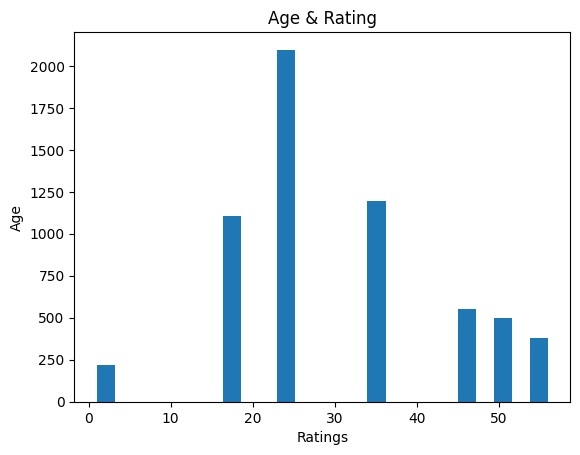

In [17]:
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, Perceptron, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
accuracy_decisiontree = round(decision_tree.score(train, train_labels) * 100, 2)
accuracy_decisiontree

98.54

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
accuracy_randomforest = round(random_forest.score(train, train_labels) * 100, 2)
accuracy_randomforest

<ipython-input-31-d273496a8be3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train, train_labels)


98.54

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
accuracy_knn = round(knn.score(train, train_labels) * 100, 2)
accuracy_knn

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


57.75

In [26]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
accuracy_log = round(logreg.score(train, train_labels) * 100, 2)
accuracy_log

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.76

In [33]:
ml = pd.DataFrame({
    'ML_Model': ['decision trees','random forest','knn','logistic regression'],
    'Accuracy': [accuracy_decisiontree,accuracy_randomforest,accuracy_knn,accuracy_log]})
ml.sort_values(by='Accuracy')

,ML_Model,Accuracy
3,logistic regression,32.76
2,knn,57.75
0,decision trees,98.54
1,random forest,98.54
